In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zahidmughal2343/global-cancer-patients-2015-2024")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/


In [77]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import re
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from IPython.display import FileLink
warnings.filterwarnings('ignore')
sns.set()

In [5]:
os.listdir('/kaggle/input/')

['global_cancer_patients_2015_2024.csv']

In [6]:
df = pd.read_csv('/kaggle/input/global_cancer_patients_2015_2024.csv')
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [25]:
df.shape

(50000, 15)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [27]:
df.apply(pd.isnull).sum()

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

In [28]:
df.duplicated().sum()

0

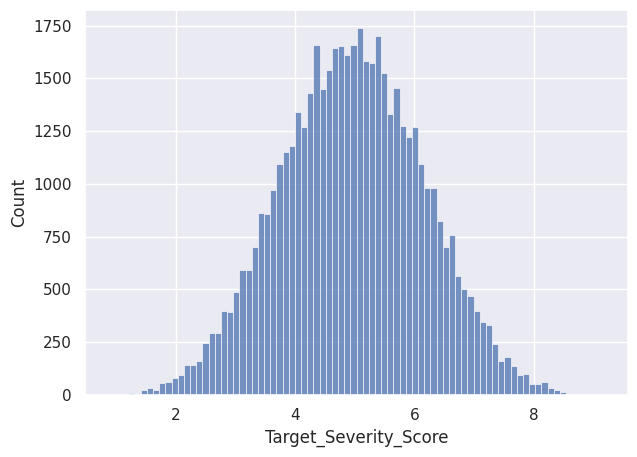

In [29]:
plt.figure(figsize = (7, 5))
sns.histplot(data = df, x = 'Target_Severity_Score', bins = 80)
plt.show()

In [30]:
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [31]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

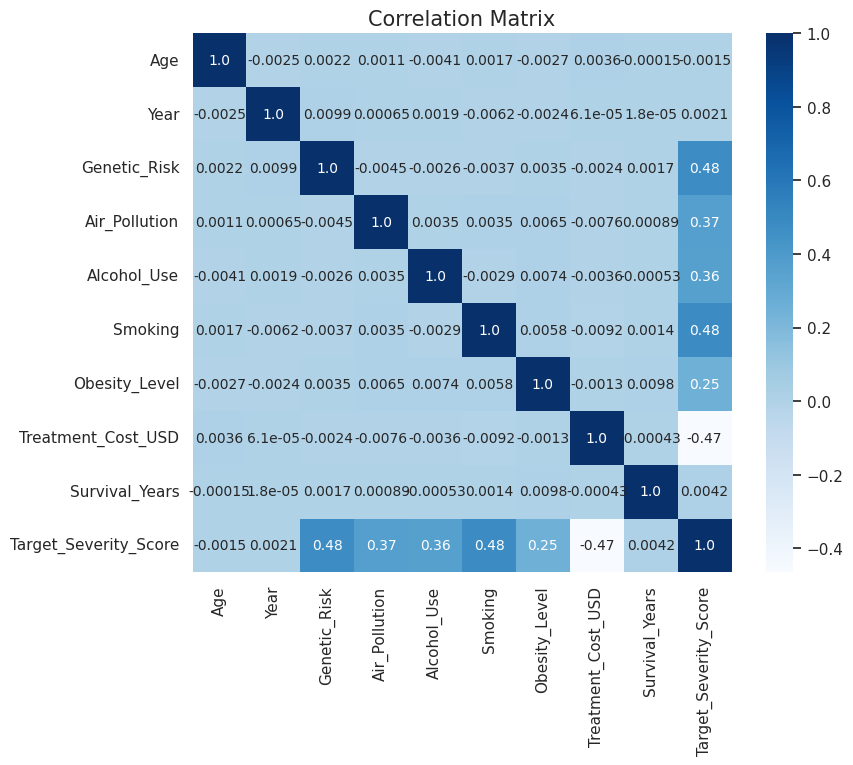

In [32]:
plt.figure(figsize = (9, 7))
sns.heatmap(df.corr(numeric_only = True), annot = True, square = True, cbar = True, annot_kws = {'size': 10}, fmt = '.2', cmap = 'Blues')
plt.title('Correlation Matrix', fontsize = 15)
plt.show()

In [33]:
categorical_columns, numerical_columns = [], []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [34]:
print(categorical_columns)

['Patient_ID', 'Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']


In [35]:
categorical_columns.remove('Patient_ID')

In [36]:
print(f'*** Categorical columns are: {categorical_columns}')
print(f'*** Number of categorical columns: {len(categorical_columns)}')
print(f'+++ Numerical columns are: {numerical_columns}')
print(f'+++ Number of numerical columns: {len(numerical_columns)}')

*** Categorical columns are: ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']
*** Number of categorical columns: 4
+++ Numerical columns are: ['Age', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years', 'Target_Severity_Score']
+++ Number of numerical columns: 10


*** Gender
Number of unique values are: 3
Unique values are: ['Male' 'Female' 'Other']
Value counts of unique values are:
 Gender
Male      16796
Female    16709
Other     16495
Name: count, dtype: int64


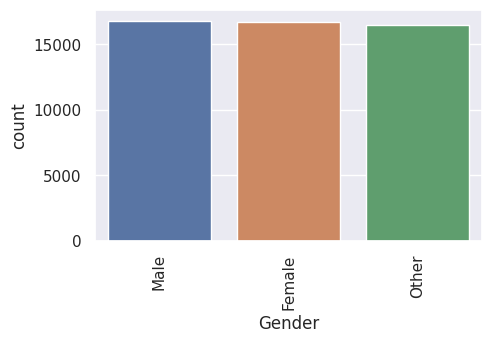

*** Country_Region
Number of unique values are: 10
Unique values are: ['UK' 'China' 'Pakistan' 'Brazil' 'Germany' 'Canada' 'USA' 'India'
 'Australia' 'Russia']
Value counts of unique values are:
 Country_Region
Australia    5092
UK           5060
USA          5060
India        5040
Germany      5024
Russia       5017
Brazil       5004
Pakistan     4926
China        4913
Canada       4864
Name: count, dtype: int64


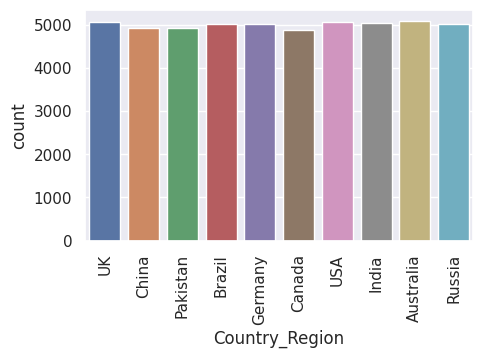

*** Cancer_Type
Number of unique values are: 8
Unique values are: ['Lung' 'Leukemia' 'Breast' 'Colon' 'Skin' 'Cervical' 'Prostate' 'Liver']
Value counts of unique values are:
 Cancer_Type
Colon       6376
Prostate    6308
Leukemia    6266
Liver       6249
Skin        6231
Cervical    6222
Breast      6189
Lung        6159
Name: count, dtype: int64


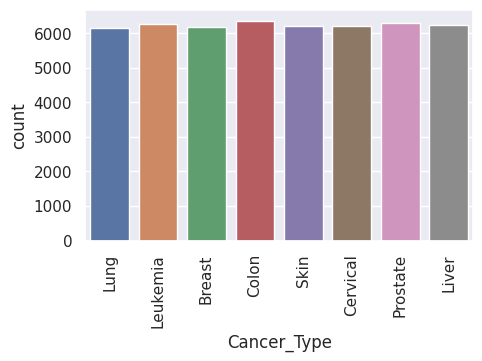

*** Cancer_Stage
Number of unique values are: 5
Unique values are: ['Stage III' 'Stage 0' 'Stage II' 'Stage I' 'Stage IV']
Value counts of unique values are:
 Cancer_Stage
Stage II     10124
Stage I      10046
Stage III    10008
Stage IV      9933
Stage 0       9889
Name: count, dtype: int64


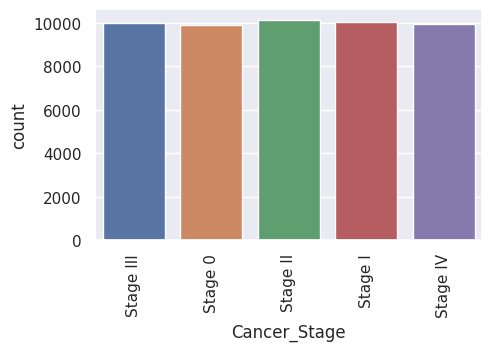

In [37]:
for column in categorical_columns:
    print(f'*** {column}')
    print(f'Number of unique values are: {df[column].nunique()}')
    print(f'Unique values are: {df[column].unique()}')
    print(f'Value counts of unique values are:\n {df[column].value_counts()}')
    plt.figure(figsize = (5, 3))
    sns.countplot(data = df, x = column)
    plt.xticks(rotation = 90)
    plt.show()
    print('=========================================================================')

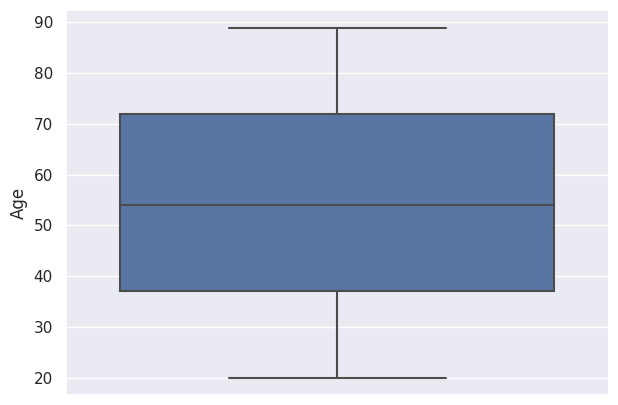

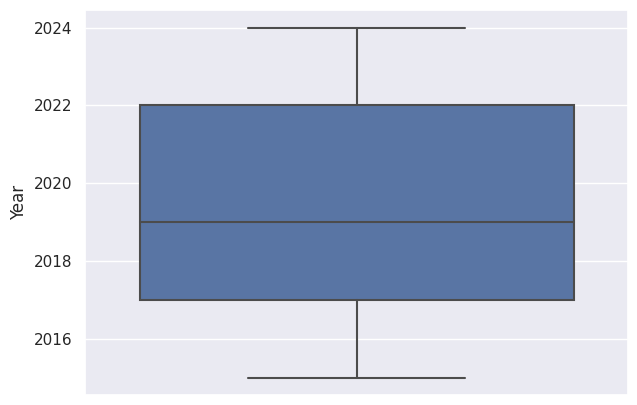

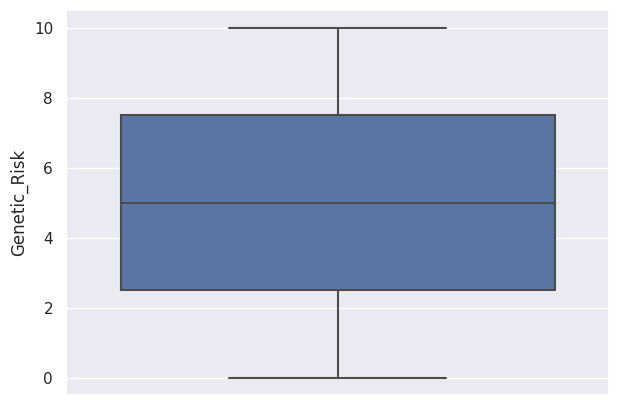

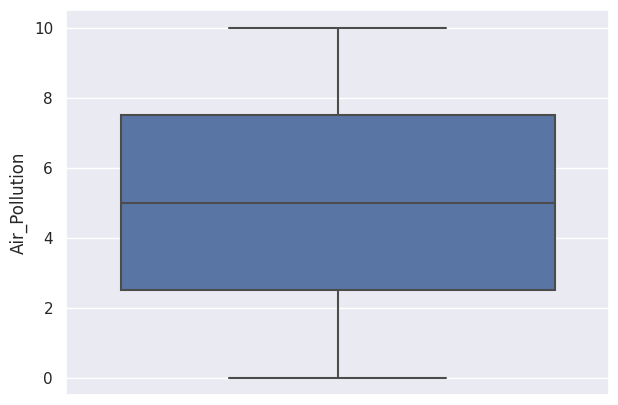

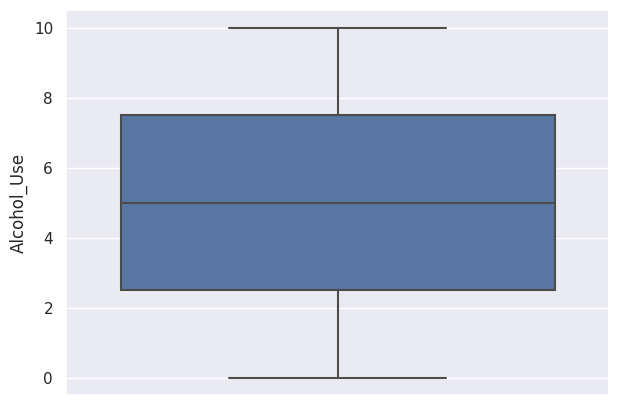

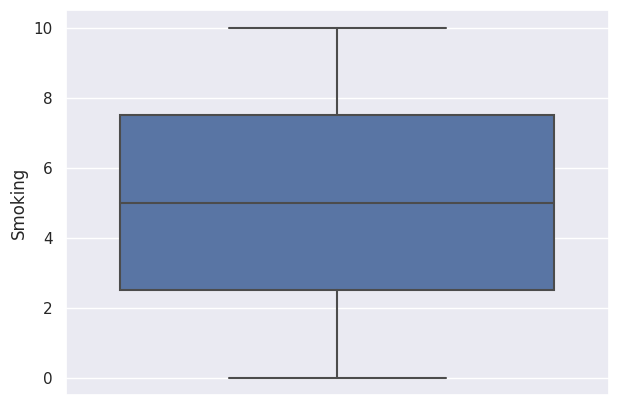

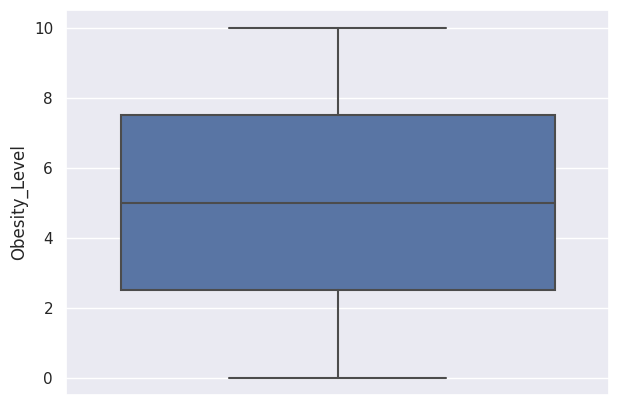

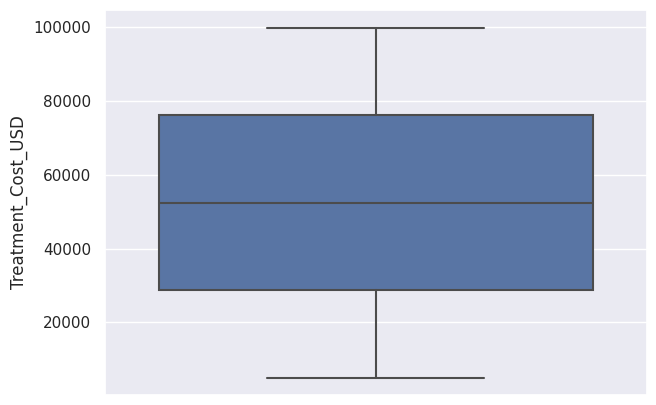

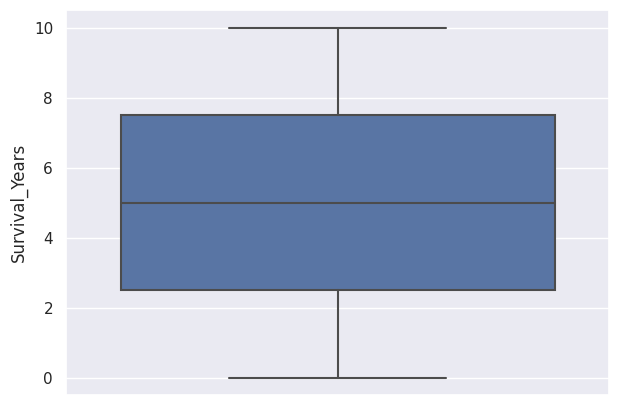

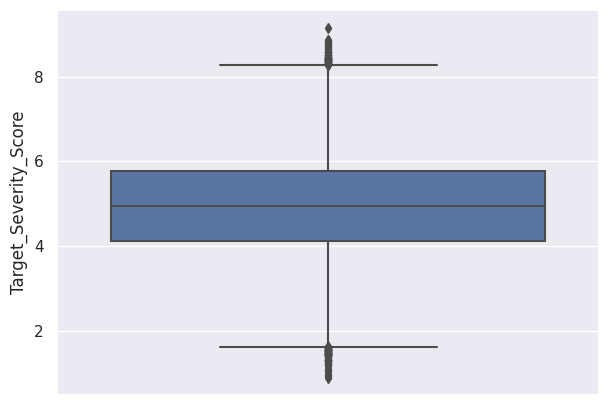

In [38]:
for column in numerical_columns:
    plt.figure(figsize = (7, 5))
    sns.boxplot(data = df, y = column)
    plt.show()

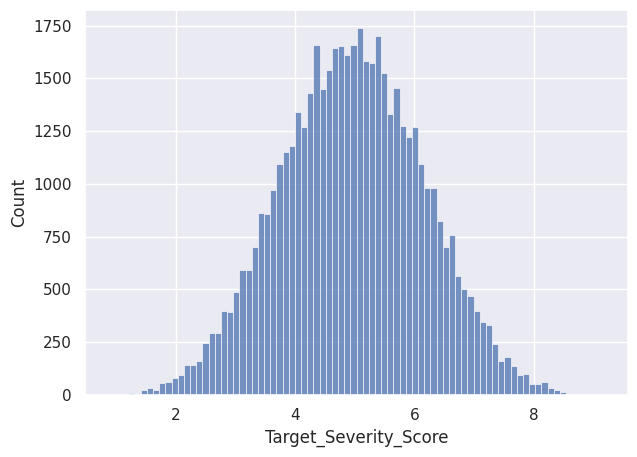

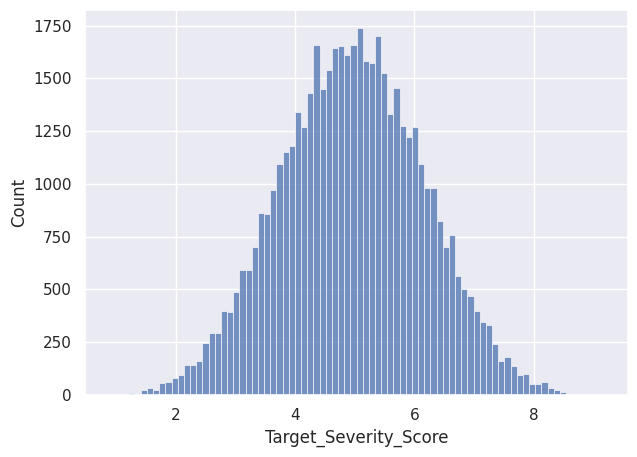

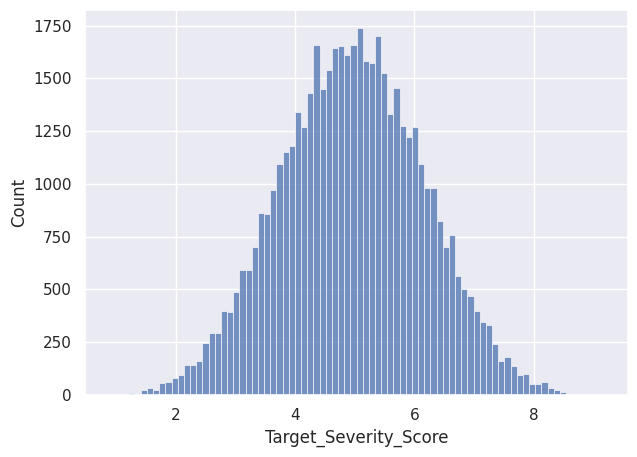

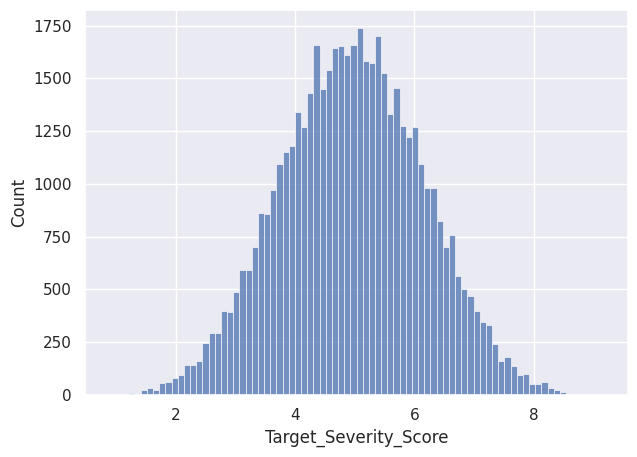

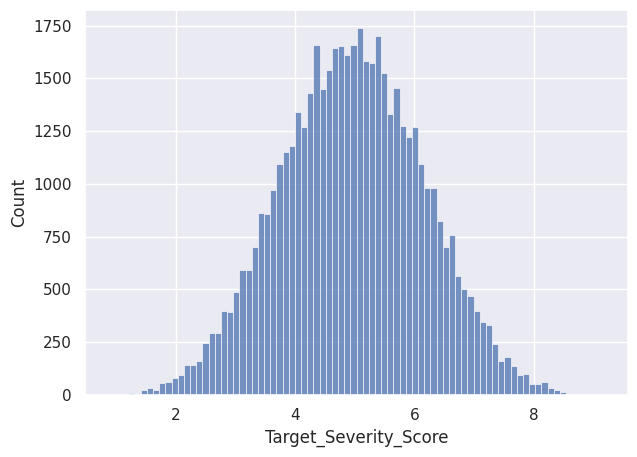

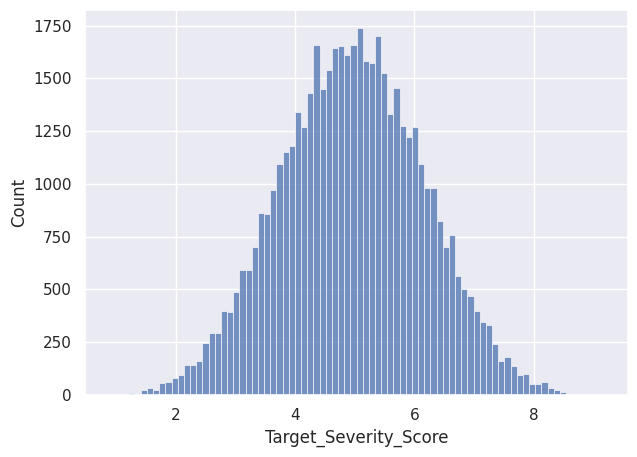

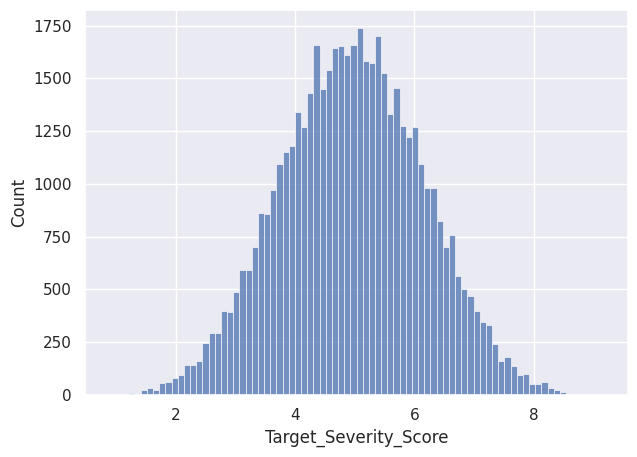

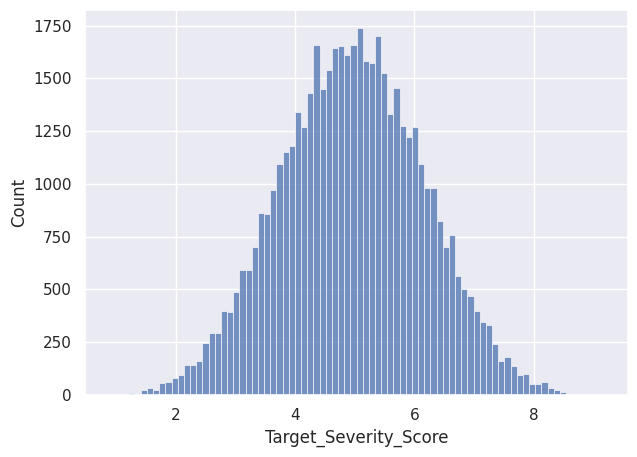

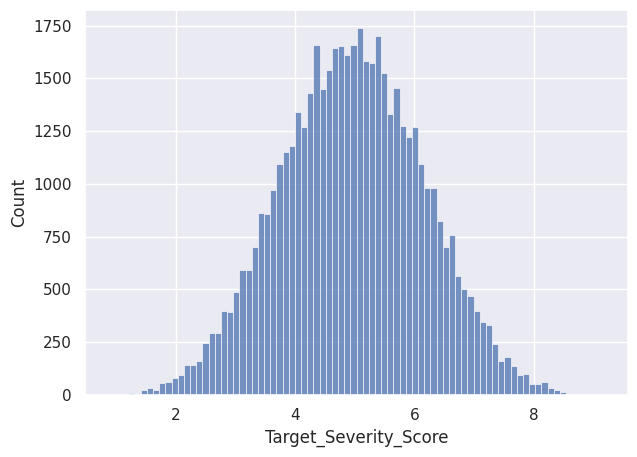

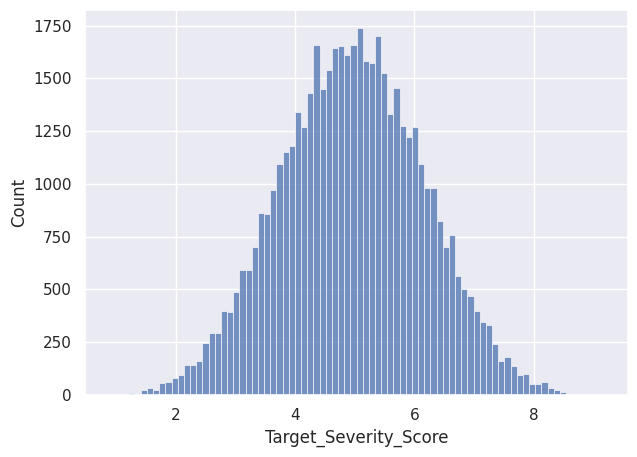

In [39]:
for columns in numerical_columns:
    plt.figure(figsize = (7, 5))
    sns.histplot(data = df, x = column, bins = 80)
    plt.show()

In [40]:
numerical_columns.remove('Target_Severity_Score')

In [41]:
ct = ColumnTransformer(transformers = [
    ('imputer', SimpleImputer(missing_values = np.nan, strategy = 'median'), numerical_columns),
    ('encoder', OneHotEncoder(drop = 'first', handle_unknown = 'ignore'), categorical_columns)
], remainder = 'passthrough')

In [42]:
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [43]:
df.shape

(50000, 15)

In [44]:
df_train = df[:35000]

In [45]:
df_valid = df[35000:40000]

In [46]:
df_test = df[40000:]

In [47]:
print(f'Training set size: {df_train.shape[0]}')
print(f'Test set size: {df_test.shape[0]}')
print(f'Validation set size: {df_valid.shape[0]}')

Training set size: 35000
Test set size: 10000
Validation set size: 5000


In [48]:
X_train = df_train.drop(columns = ['Target_Severity_Score'], axis = 1)
y_train = df_train['Target_Severity_Score']

In [49]:
X_test = df_test.drop(columns = ['Target_Severity_Score'], axis = 1)
y_test = df_test['Target_Severity_Score']

In [50]:
X_valid = df_valid.drop(columns = ['Target_Severity_Score'], axis = 1)
y_valid = df_valid['Target_Severity_Score']

In [51]:
X_train.drop(columns = ['Patient_ID'], axis = 'column', inplace = True)
X_test.drop(columns = ['Patient_ID'], axis = 'column', inplace = True)
X_valid.drop(columns = ['Patient_ID'], axis = 'column', inplace = True)

In [52]:
X_train_n = ct.fit_transform(X_train)

In [53]:
X_test_n = ct.fit_transform(X_test)

In [54]:
X_valid_n = ct.fit_transform(X_valid)

In [55]:
X_train_n

array([[7.100e+01, 2.021e+03, 6.400e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.400e+01, 2.021e+03, 1.300e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [8.000e+01, 2.023e+03, 7.400e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [7.300e+01, 2.019e+03, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.500e+01, 2.023e+03, 9.100e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [5.400e+01, 2.022e+03, 6.000e-01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [36]:
dt = DecisionTreeRegressor()

In [231]:
param_grid = {'max_depth': [10, 15, 20, 25, 30, 35], 'min_samples_split': [3, 6, 10], 'min_samples_leaf': [1, 5, 10, 15]}

In [232]:
grid_dt = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5)

In [233]:
grid_dt.fit(X_train_n, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 15, 20, 25, 30, 35],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [3, 6, 10]})

In [234]:
grid_dt.best_params_

{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 6}

In [251]:
grid_dt.best_score_

0.9106679526196197

In [252]:
print(f'Cross validation score of Decision Tree Regressor: {grid_dt.best_score_}')

Cross validation score of Decision Tree Regressor: 0.9106679526196197


In [235]:
model_dt = DecisionTreeRegressor(max_depth = 20, min_samples_leaf = 5, min_samples_split = 6)

In [238]:
model_dt.fit(X_train_n, y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=6)

In [239]:
y_pred_valid = model_dt.predict(X_valid_n)

In [242]:
print(f'Mean Absolute Error of valiadation set: {mean_absolute_error(y_valid, y_pred_valid)}')
print(f'Mean Squared Error of validation set: {mean_squared_error(y_valid, y_pred_valid)}')
print(f'Root Mean Squared Error of validation set: {np.sqrt(mean_squared_error(y_valid, y_pred_valid))}')

Mean Absolute Error of valiadation set: 0.27070328095238094
Mean Squared Error of validation set: 0.11416511394412951
Root Mean Squared Error of validation set: 0.33788328449944


In [244]:
df_train['Target_Severity_Score'].mean()

4.954758285714286

In [256]:
bg = BaggingRegressor(estimator = dt, n_estimators = 50)

In [257]:
cvs_bg = cross_val_score(bg, X_train_n, y_train, cv = 5)

In [259]:
print(f'Cross validation score of Bagging Classifier with 50 estimatot: {cvs_bg.mean()}')

Cross validation score of Bagging Classifier with 50 estimatot: 0.975062738366997


In [262]:
bg2 = BaggingRegressor(estimator = dt, n_estimators = 100)

In [263]:
cvs_bg2 = cross_val_score(bg2, X_train_n, y_train, cv = 5)

In [265]:
print(f'Cross validation score of Bagging Classifier with 100 estimatot: {cvs_bg2.mean()}')

Cross validation score of Bagging Classifier with 100 estimatot: 0.9758532050270871


In [266]:
bg2.fit(X_train_n, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100)

In [267]:
y_pred_val2 = bg2.predict(X_valid_n)

In [269]:
print(f'Mean Absolute Error of valiadation set: {mean_absolute_error(y_valid, y_pred_val2)}')
print(f'Mean Squared Error of validation set: {mean_squared_error(y_valid, y_pred_val2)}')
print(f'Root Mean Squared Error of validation set: {np.sqrt(mean_squared_error(y_valid, y_pred_val2))}')

Mean Absolute Error of valiadation set: 0.14149758
Mean Squared Error of validation set: 0.03164189031800001
Root Mean Squared Error of validation set: 0.17788167504833097


In [38]:
rf = RandomForestRegressor()

In [49]:
param_grid3 = {'max_depth': [10, 15, 20, 25], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 6, 10], 'max_features': ['sqrt']}

In [50]:
grid_rf = GridSearchCV(rf, param_grid = param_grid3, cv = 5)

In [51]:
grid_rf.fit(X_train_n, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15, 20, 25],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 6, 10],
                         'min_samples_split': [2, 6, 10]})

In [52]:
grid_rf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [54]:
rf_model = RandomForestRegressor(max_depth = 20, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, oob_score = True)

In [57]:
rf_model.fit(X_train_n, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', oob_score=True)

In [59]:
print(f'oob score of Random Forest Regressor: {rf_model.oob_score_}')

oob score of Random Forest Regressor: 0.9265067310901393


In [60]:
rf_pred_valid = rf_model.predict(X_valid_n)

In [62]:
print(f'Mean Absolute Error of validation set: {mean_absolute_error(y_valid, rf_pred_valid)}')
print(f'Mean Squared Error of validation set: {mean_squared_error(y_valid, rf_pred_valid)}')
print(f'Root Mean Squared Error of validation set: {np.sqrt(mean_squared_error(y_valid, rf_pred_valid))}')

Mean Absolute Error of validation set: 0.2474593605816201
Mean Squared Error of validation set: 0.09664600519219273
Root Mean Squared Error of validation set: 0.31087940618862603


In [69]:
gb_model = GradientBoostingRegressor()

In [70]:
cvs_gb = cross_val_score(gb_model, X_train_n, y_train, cv = 5)

In [71]:
print(f'5-fold cross validation score of Gradient Boosting Regressor: {cvs_gb.mean()}')

5-fold cross validation score of Gradient Boosting Regressor: 0.9901997803138398


In [76]:
gb_model.fit(X_train_n, y_train)

GradientBoostingRegressor()

In [78]:
gb_pred_valid = gb_model.predict(X_valid_n)

In [79]:
print(f'Mean Absolute Error of validation set: {mean_absolute_error(y_valid, gb_pred_valid)}')
print(f'Mean Squared Error of validation set: {mean_squared_error(y_valid, gb_pred_valid)}')
print(f'Root Mean Squared Error of validation set: {np.sqrt(mean_squared_error(y_valid, gb_pred_valid))}')

Mean Absolute Error of validation set: 0.09063638510119619
Mean Squared Error of validation set: 0.012885418335560513
Root Mean Squared Error of validation set: 0.11351395656728962


In [81]:
ada_model = AdaBoostRegressor()

In [82]:
ada_cvs = cross_val_score(ada_model, X_train_n, y_train, cv = 5)

In [84]:
print(f'5-fold cross validation score od Ada Boost Regressor: {ada_cvs.mean()}')

5-fold cross validation score od Ada Boost Regressor: 0.8731386142386809


In [85]:
ada_model.fit(X_train_n, y_train)

AdaBoostRegressor()

In [86]:
ada_pred_valid = ada_model.predict(X_valid_n)

In [87]:
print(f'Mean Absolute Error of validation set: {mean_absolute_error(y_valid, ada_pred_valid)}')
print(f'Mean Squared Error of validation set: {mean_squared_error(y_valid, ada_pred_valid)}')
print(f'Root Mean Squared Error of validation set: {np.sqrt(mean_squared_error(y_valid, ada_pred_valid))}')

Mean Absolute Error of validation set: 0.3398232316631416
Mean Squared Error of validation set: 0.1827447761437027
Root Mean Squared Error of validation set: 0.42748658007439566


In [60]:
base_models = [
    ('decision_tree', DecisionTreeRegressor(max_depth = 20, min_samples_leaf = 5, min_samples_split = 6)),
    ('random forest', RandomForestRegressor(max_depth = 20, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2)),
    ('gbr', GradientBoostingRegressor())
]

In [68]:
meta_model = LinearRegression()

In [69]:
stacking = StackingRegressor(
    estimators = base_models,
    final_estimator = meta_model,
)

In [70]:
cvs = cross_val_score(stacking, X_train_n, y_train, cv = 5)

In [72]:
print(f'cross validation score of stacking method:', cvs.mean())

cross validation score of stacking method: 0.99315402140377


In [73]:
stacking.fit(X_train_n, y_train)

StackingRegressor(estimators=[('decision_tree',
                               DecisionTreeRegressor(max_depth=20,
                                                     min_samples_leaf=5,
                                                     min_samples_split=6)),
                              ('random forest',
                               RandomForestRegressor(max_depth=20,
                                                     max_features='sqrt')),
                              ('gbr', GradientBoostingRegressor())],
                  final_estimator=LinearRegression())

In [74]:
preds = stacking.predict(X_valid_n)

In [75]:
print(f'Mean Absolute Error of validation set: {mean_absolute_error(y_valid, preds)}')
print(f'Mean Squared Error of validation set: {mean_squared_error(y_valid, preds)}')
print(f'Root Mean Squared Error of validation set: {np.sqrt(mean_squared_error(y_valid, preds))}')

Mean Absolute Error of validation set: 0.07633844479421116
Mean Squared Error of validation set: 0.009033435127300458
Root Mean Squared Error of validation set: 0.09504438503825703


In [79]:
ds1 = pd.DataFrame(X_train_n)
ds1.to_csv('X_train.csv', index = False)

In [80]:
FileLink('X_train.csv')

/kaggle/working/X_train.csv

In [81]:
ds2 = pd.DataFrame(y_train)
ds2.to_csv('y_train.csv', index = False)

In [82]:
FileLink('y_train.csv')

/kaggle/working/y_train.csv

In [83]:
ds3 = pd.DataFrame(X_valid_n)
ds3.to_csv('X_valid.csv', index = False)

In [85]:
FileLink('X_valid.csv')

/kaggle/working/X_valid.csv

In [86]:
ds4 = pd.DataFrame(y_valid)
ds4.to_csv('y_valid.csv', index = False)

In [87]:
FileLink('y_valid.csv')

/kaggle/working/y_valid.csv

In [90]:
ds5 = pd.DataFrame(X_test_n)
ds5.to_csv('X_test.csv', index = False)

In [91]:
FileLink('X_test.csv')

/kaggle/working/X_test.csv

In [92]:
ds6 = pd.DataFrame(y_test)
ds6.to_csv('y_test.csv', index = False)

In [93]:
FileLink('y_test.csv')

/kaggle/working/y_test.csv

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from tqdm import trange
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set()

In [2]:
X_train = pd.read_csv('/kaggle/input/x-train/X_train.csv')

In [3]:
y_train = pd.read_csv('/kaggle/input/x-train/y_train.csv')

In [4]:
X_valid = pd.read_csv('/kaggle/input/x-train/X_valid.csv')

In [5]:
y_valid = pd.read_csv('/kaggle/input/x-train/y_valid.csv')

In [6]:
X_test = pd.read_csv('/kaggle/input/x-train/X_test.csv')

In [7]:
y_test = pd.read_csv('/kaggle/input/x-train/y_test.csv')

In [8]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,71.0,2021.0,6.4,2.8,9.5,0.9,8.7,62913.44,5.9,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,34.0,2021.0,1.3,4.5,3.7,3.9,6.3,12573.41,4.7,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80.0,2023.0,7.4,7.9,2.4,4.7,0.1,6984.33,7.1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40.0,2015.0,1.7,2.9,4.8,3.5,2.7,67446.25,1.6,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,43.0,2017.0,5.1,2.8,2.3,6.7,0.5,77977.12,2.9,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [9]:
scaler = StandardScaler()

In [10]:
X_train_scaled = scaler.fit_transform(X_train)

In [11]:
X_valid_scaled = scaler.transform(X_valid)

In [12]:
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled.shape

(35000, 31)

In [14]:
class MyDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype = torch.float32)
        self.labels = torch.tensor(labels, dtype = torch.float32)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [15]:
train_dataset = MyDataset(X_train_scaled, y_train.values)
valid_dataset = MyDataset(X_valid_scaled, y_valid.values)
test_dataset = MyDataset(X_test_scaled, y_test.values)

In [16]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
valid_loader = DataLoader(valid_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = True)

In [17]:
for data, label in train_loader:
    print(f'Batch data size: {len(data)}')
    print(f'{label[1]}')
    break

Batch data size: 32
tensor([4.7200])


In [18]:
device = ('cuda' if torch.cuda.is_available()
         else 'msp' if torch.backends.mps.is_available()
         else 'cpu')
print(f'Using {device} device')

Using cuda device


In [19]:
def plot_results(train_losses, valid_losses):
    xs = np.arange(1, len(train_losses) + 1, 1)
    plt.figure(figsize = (7, 5))
    plt.plot(xs, train_losses, label = 'Train Loss', color = 'teal')
    plt.plot(xs, valid_losses, label = 'Validation Loss', color = 'orange')
    plt.title('Training loss vs Validation loss', fontsize = 15)
    plt.xlabel('Epochs', fontsize = 10)
    plt.ylabel('Loss', fontsize = 10)
    plt.legend()
    plt.show()

In [20]:
def train_step(model, criterion, optimizer, dataloader, device = device):
    running_loss = 0.0
    model.train()
    optimizer.zero_grad()
    for x, y in dataloader:
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(dataloader)

In [21]:
def valid_step(model, criterion, dataloader, device = device):
    running_loss = 0.0
    model.eval()
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            pred = model(x)
            running_loss += criterion(pred, y).item()
    return running_loss / len(dataloader)

In [22]:
def train_model(model, n_epochs, optimizer, train_loader, valid_loader, device = device):
    train_losses, valid_losses = [], []
    criterion = nn.MSELoss()
    for _ in (pbar := trange(n_epochs)):
        train_loss = train_step(model, criterion, optimizer, train_loader, device)
        valid_loss = valid_step(model, criterion, valid_loader, device)
        pbar.set_description(f'Train Loss: {train_loss} | Valid Loss: {valid_loss}')
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
    plot_results(train_losses, valid_losses)
    return {'train_loss': train_losses, 'valid_loss': valid_losses}

In [23]:
class NN(nn.Module):
    def __init__(self, input_size):
        super(NN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 2056),
            nn.BatchNorm1d(2056),
            nn.ReLU(),
            nn.Dropout(0.50),
            nn.Linear(2056, 2056),
            nn.BatchNorm1d(2056),
            nn.ReLU(),
            nn.Dropout(0.50),
            nn.Linear(2056, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(1024, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.05),
            nn.Linear(256, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.05),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.05),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.05),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.05),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

Train Loss: 0.19380543957476315 | Valid Loss: 0.10948632282626097: 100%|██████████| 30/30 [04:55<00:00,  9.86s/it]


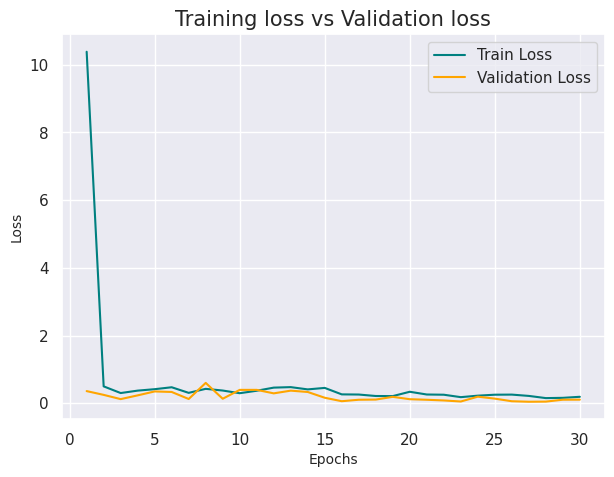

In [89]:
model = NN(input_size = 31).to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
results = train_model(model, 30, optimizer, train_loader, valid_loader, device = device)

In [24]:
class NN2(nn.Module):
    def __init__(self, input_size):
        super(NN2, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 2056),
            nn.BatchNorm1d(2056),
            nn.ReLU(),
            nn.Linear(2056, 2056),
            nn.BatchNorm1d(2056),
            nn.ReLU(),
            nn.Linear(2056, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

Train Loss: 0.21377320281252046 | Valid Loss: 0.5748567389454812: 100%|██████████| 30/30 [04:11<00:00,  8.37s/it] 


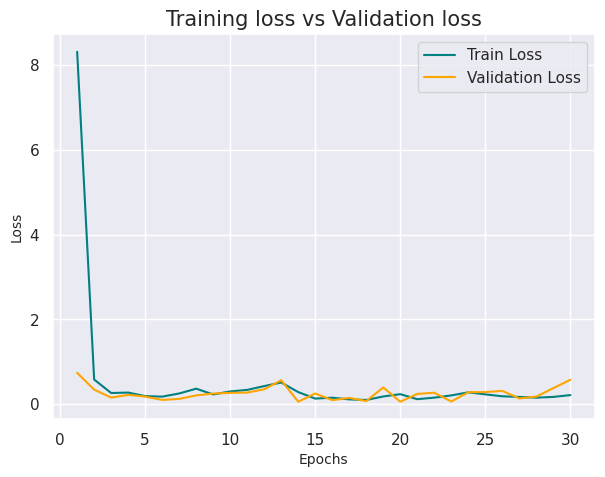

In [25]:
model = NN2(input_size = 31).to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
results = train_model(model, 30, optimizer, train_loader, valid_loader, device = device)

In [26]:
class NN3(nn.Module):
    def __init__(self, input_size):
        super(NN3, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 2056),
            nn.ReLU(),
            nn.Linear(2056, 2056),
            nn.ReLU(),
            nn.Linear(2056, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

Train Loss: 0.19850816002023666 | Valid Loss: 0.08742746542308741: 100%|██████████| 30/30 [03:12<00:00,  6.41s/it]


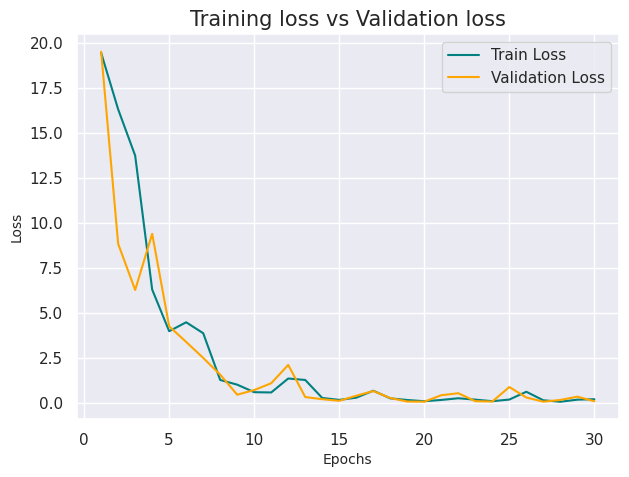

In [27]:
model = NN3(input_size = 31).to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
results = train_model(model, 30, optimizer, train_loader, valid_loader, device = device)

In [28]:
class NN4(nn.Module):
    def __init__(self, input_size):
        super(NN4, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 2056),
            nn.ReLU(),
            nn.Dropout(0.50),
            nn.Linear(2056, 2056),
            nn.ReLU(),
            nn.Dropout(0.50),
            nn.Linear(2056, 1024),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.05),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(0.05),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.05),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.05),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.05),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

Train Loss: 1.540208688056883 | Valid Loss: 1.523647285191117: 100%|██████████| 30/30 [03:31<00:00,  7.05s/it]  


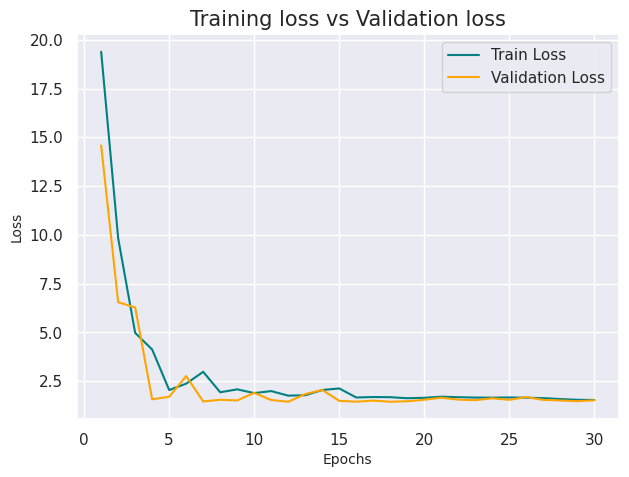

In [29]:
model = NN4(input_size = 31).to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
results = train_model(model, 30, optimizer, train_loader, valid_loader, device = device)

In [41]:
class NN5(nn.Module):
    def __init__(self, input_size):
        super(NN5, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 2056),
            nn.ReLU(),
            nn.Linear(2056, 2056),
            nn.ReLU(),
            nn.Linear(2056, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

Train Loss: 1.5242386633016074 | Valid Loss: 1.5346563739381778: 100%|██████████| 30/30 [03:08<00:00,  6.27s/it]


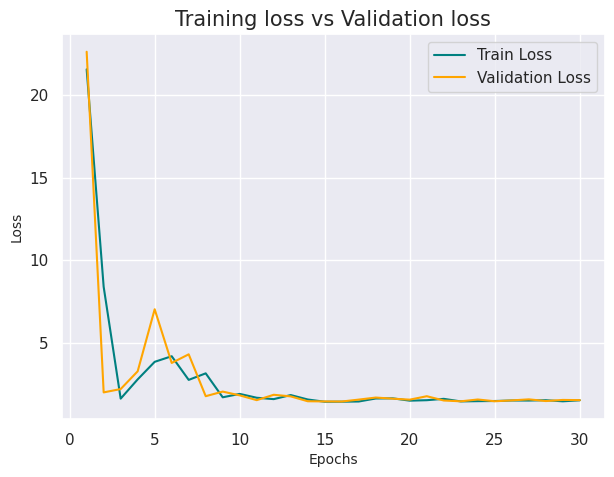

In [42]:
model = NN5(input_size = 31).to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
results = train_model(model, 30, optimizer, train_loader, valid_loader, device = device)

In [86]:
from keras.models import Sequential
from keras.layers import Input, Dense, ReLU, BatchNormalization
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [57]:
model = Sequential()

In [58]:
model.add(Input(shape = (31,)))
model.add(Dense(2056))
model.add(ReLU())
model.add(Dense(2056))
model.add(ReLU())
model.add(Dense(1024))
model.add(ReLU())
model.add(Dense(1024))
model.add(ReLU())
model.add(Dense(512))
model.add(ReLU())
model.add(Dense(512))
model.add(ReLU())
model.add(Dense(256))
model.add(ReLU())
model.add(Dense(256))
model.add(ReLU())
model.add(Dense(128))
model.add(ReLU())
model.add(Dense(128))
model.add(ReLU())
model.add(Dense(64))
model.add(ReLU())
model.add(Dense(1, activation = 'linear'))

In [59]:
model.compile(
    optimizer = 'adam',
    loss = 'mse'
)

In [61]:
history = model.fit(X_train_scaled, y_train, validation_data = (X_valid_scaled, y_valid), epochs = 60, batch_size = 32)

Epoch 1/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 2.6585 - val_loss: 0.0047
Epoch 2/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0098 - val_loss: 0.0042
Epoch 3/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0135 - val_loss: 0.0074
Epoch 4/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0195 - val_loss: 0.0013
Epoch 5/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0050 - val_loss: 0.0013
Epoch 6/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0047 - val_loss: 0.0339
Epoch 7/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0057 - val_loss: 0.0149
Epoch 8/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0040 - val_loss: 6.7728e-04
Epoch 9/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0026 - val_loss: 6.4318e-04
Epoch 10/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0024 - val_loss: 3.8930e-04
Epoch 11/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 12/60
1094/

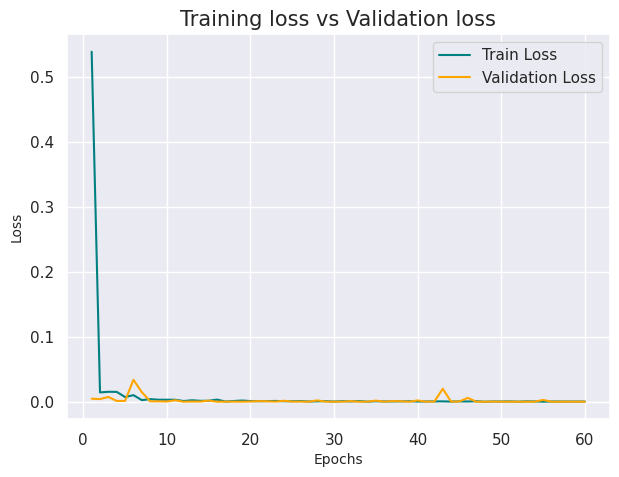

In [62]:
plot_results(history.history['loss'], history.history['val_loss'])

In [64]:
model.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0070e-04


8.83273096405901e-05

In [71]:
model2 = Sequential()

In [72]:
model2.add(Input(shape = (31,)))
model2.add(Dense(2056))
model2.add(BatchNormalization())
model2.add(ReLU())
model2.add(Dense(2056))
model2.add(BatchNormalization())
model2.add(ReLU())
model2.add(Dense(1024))
model2.add(BatchNormalization())
model2.add(ReLU())
model2.add(Dense(1024))
model2.add(BatchNormalization())
model2.add(ReLU())
model2.add(Dense(512))
model2.add(BatchNormalization())
model2.add(ReLU())
model2.add(Dense(512))
model2.add(BatchNormalization())
model2.add(ReLU())
model2.add(Dense(256))
model2.add(BatchNormalization())
model2.add(ReLU())
model2.add(Dense(256))
model2.add(BatchNormalization())
model2.add(ReLU())
model2.add(Dense(128))
model2.add(BatchNormalization())
model2.add(ReLU())
model2.add(Dense(128))
model2.add(BatchNormalization())
model2.add(ReLU())
model2.add(Dense(64))
model2.add(BatchNormalization())
model2.add(ReLU())
model2.add(Dense(1, activation = 'linear'))

In [73]:
model2.compile(
    optimizer = 'adam',
    loss = 'mse'
)

In [74]:
history2 = model2.fit(X_train_scaled, y_train, validation_data = (X_valid_scaled, y_valid), epochs = 60, batch_size = 32)

Epoch 1/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 5.0281 - val_loss: 0.0308
Epoch 2/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1081 - val_loss: 0.0415
Epoch 3/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0980 - val_loss: 0.0418
Epoch 4/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0921 - val_loss: 0.0233
Epoch 5/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0839 - val_loss: 0.0660
Epoch 6/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0834 - val_loss: 0.0493
Epoch 7/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0806 - val_loss: 0.0791
Epoch 8/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0871 - val_loss: 0.1180
Epoch 9/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0806 - val_loss: 0.0803
Epoch 10/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0752 - val_loss: 0.0584
Epoch 11/60
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0840 - val_loss: 0.0217
Epoch 12/60
1094/1094 ━━━━━━━

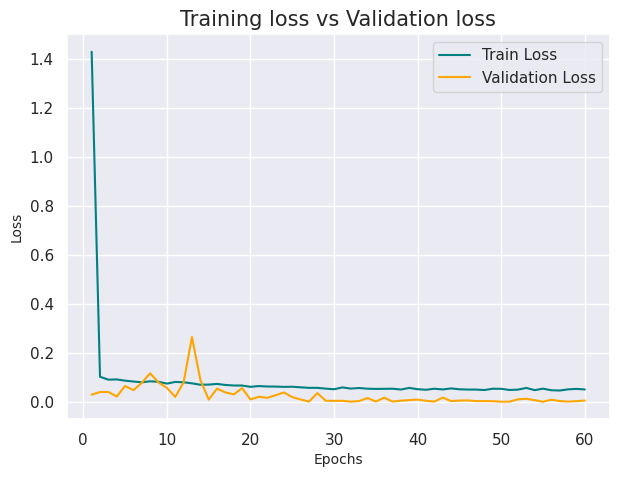

In [75]:
plot_results(history2.history['loss'], history2.history['val_loss'])

In [77]:
model2.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0069


0.006802021991461515

In [84]:
pred_n = model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [85]:
print(f'Mean Absolute Error of model: {mean_absolute_error(y_test, pred_n)}')
print(f'Mean Squared Error of model: {mean_squared_error(y_test, pred_n)}')
print(f'Root Mean Squared Error of model: {np.sqrt(mean_squared_error(y_test, pred_n))}')

Mean Absolute Error of model: 0.00728737947010994
Mean Squared Error of model: 8.832731954577538e-05
Root Mean Squared Error of model: 0.009398261517204944
